In [1]:
%pylab inline
import sys
sys.path.append('../../MW-LMC-SCF/code')
sys.path.append('../scf_coefficients/')

from read_coefficients import load_scf_coefficients
plt.style.use('~/matplotlib.mplstyle')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import gala.potential as gp
import k3d
import bfe
import astropy.units as u

In [11]:
# Load Expansions 

def load_gc23_exp(mwlmc, n_init, n_final, host=False, sat=False,): 
    path_to_exp = "../../data/expansion/{}_1e7/".format(mwlmc)
    host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_host_snap_".format(mwlmc)
    sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_debris_test_sat_snap_".format(mwlmc)

    
    #host_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_host_snap_".format(mwlmc)
    #sat_path = "BFE_{}_grav_MO3_simple_1e7_COM_n20_l20_sat_snap_".format(mwlmc)

    nsnaps = n_final - n_init
    
    coefficients = []
    exp_length = []
    exp_param = []
    com = []
    
    if host == True:
        host_coeff = np.zeros((nsnaps, 5, 21, 21, 21))
        host_rcom = np.zeros((nsnaps, 3))
        for i in range(n_init, n_final):
            print('snap {:03d}'.format(i))

            host_coeff[i-n_init], exp_host_length, exp_host_params, host_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + host_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(host_coeff)
        exp_length.append(exp_host_length)
        exp_param.append(exp_host_params)
        com.append(host_rcom)
        
    if sat == True:
        sat_coeff = np.zeros((nsnaps, 3, 21, 21, 21))
        sat_rcom = np.zeros((nsnaps, 3))
        
        for i in range(n_init, n_final):
            sat_coeff[i-n_init], exp_sat_length, exp_sat_params, sat_rcom[i-n_init] = bfe.ios.read_coefficients(path_to_exp
                                                                                                       + sat_path
                                                                                                       + "{:03d}".format(i))
        coefficients.append(sat_coeff)
        exp_length.append(exp_sat_length)
        exp_param.append(exp_sat_params)
        com.append(sat_rcom)
        
    
        
    return coefficients, exp_length, exp_param, com

In [15]:
mwlmc5_coeff, mwmlc5_exp_length, mwlmc5_exp_params, mwlmc5_rcom = load_gc23_exp('MWLMC5', 0, 399, True, False)

snap 000
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
here 1
here 2
here 3
snap 001
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
here 1
here 2
here 3
snap 002
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
here 1
here 2
here 3
snap 003
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
here 1
here 2
here 3
snap 004
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>
* Loading coefficients
here 1
here 2
here 3
snap 005
<KeysViewHDF5 ['G', 'Snlm', 'Tnlm', 'lmax', 'mmax', 'nmax', 'pmass', 'rcom', 'rs', 'var_STnlm', 'var_Snlm', 'var_Tnlm']>


In [ ]:
### Implement smootheningShost = mwlmc5_host_coeff[:,0]

## Smatrix = mwlmc_bfe.coefficients_smoothing.reshape_matrix(S, 20, 20, 20)
## Tmatrix = mwlmc_bfe.coefficients_smoothing.reshape_matrix(T, 20, 20, 20)

In [11]:
## Visualize fields

In [16]:
np.shape(mwlmc5_coeff)

(1, 399, 5, 21, 21, 21)

In [18]:
mwlmc5_host_coeff = mwlmc5_coeff[0]

In [22]:
Shost = mwlmc5_host_coeff[:,0]
Thost = mwlmc5_host_coeff[:,1]
Svar_host = mwlmc5_host_coeff[:,2]
Tvar_host = mwlmc5_host_coeff[:,3]
STvar_host = mwlmc5_host_coeff[:,4]

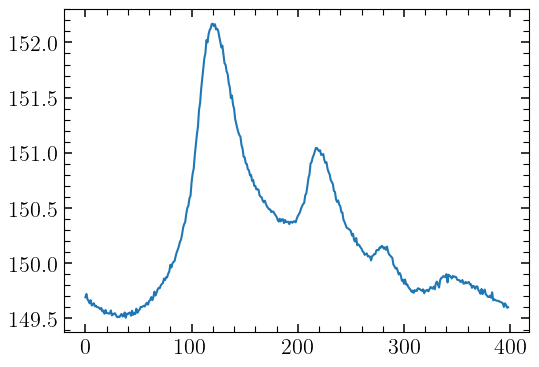

In [89]:
plt.plot(np.sum(Shost[:,:,0,0], axis=1))

In [27]:
power_host = np.sqrt(Shost**2 + Thost**2)

In [90]:
np.shape(power_host)

(399, 21, 21, 21)

In [53]:
power_host_lm = np.sum(power_host, axis=1)

In [36]:
power_host_n = np.sum(np.sum(power_host, axis=2), axis=2)

In [176]:
len(np.shape(power_host))

4

In [177]:
def power_matrices(power):
    assert len(np.shape(power)) == 4, 'Power should be a matrix of shape (time, n, l, m)'

    tmax = np.shape(power)[0]
    nmax = np.shape(power)[1]
    lmax = np.shape(power)[2]
    mmax = np.shape(power)[3]
    
    print("Computing power for, tmax={}, nmax={}, lmax={}, mmax={}".format(tmax, nmax, lmax, mmax))
    # Compute power summing over l and m
    power_n = np.sum(np.sum(power, axis=2), axis=2)
    # Compute power summing over n, and m
    #print(np.shape(test_power))
    power_l = np.zeros((399, 21))
    power_lm = np.sum(power_host, axis=1)

    for l in range(lmax):
        power_l[:,l] = np.sum(power_lm[:,l,:l+1], axis=1)
        
    return power_n, power_l
    

In [178]:
nn, ll = power_matrices(power_host)

Computing power for, tmax=399, nmax=21, lmax=21, mmax=21


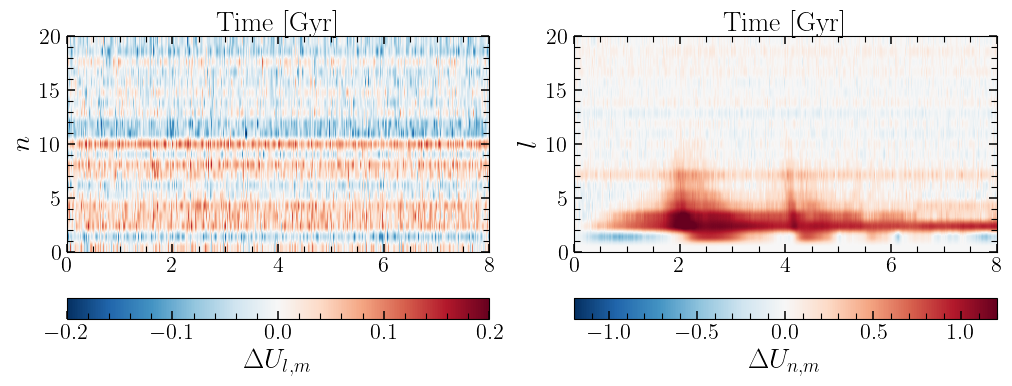

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))


im = ax[0].imshow(np.log10(nn/nn[0,:]).T, aspect='auto', origin='lower', cmap='RdBu_r', extent=[0, 8, 0, 20], vmin=-0.2, vmax=0.2)
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label(r'$\Delta U_{l,m}$')

ax[0].xaxis.set_label_position('top')
ax[0].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[0].set_ylabel('$n$')


im = ax[1].imshow(np.log10(ll/ll[0,:]).T, aspect='auto', origin='lower', cmap='RdBu_r', vmin=-1.2, vmax=1.2, extent=[0, 8, 0, 20])
cbar = plt.colorbar(im, orientation='horizontal')
cbar.set_label(r'$\Delta U_{n,m}$')
ax[1].xaxis.set_label_position('top')
ax[1].set_xlabel(r'$\rm{Time\ [Gyr]}$')
ax[1].set_ylabel('$l$')

plt.savefig('../../figures/power_scf_GC23.png', bbox_inches='tight')
plt.savefig('../../figures/power_scf_GC23.pdf', bbox_inches='tight')